In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/birthsinspain/natalidad.geojson
/kaggle/input/life-expectancy-in-spain/LIFE EXPECTANCY - tabla-1485.csv


In [2]:
life_data = pd.read_csv('../input/life-expectancy-in-spain/LIFE EXPECTANCY - tabla-1485.csv')


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar la capa temática
natalidad = "../input/birthsinspain/natalidad.geojson"
map_data = gpd.read_file(natalidad)

map_data.columns = map_data.columns.str.replace('NAME_2', 'PROVINCIA')
merged_data = pd.merge(map_data, life_data, on = 'PROVINCIA')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<AxesSubplot:title={'center':'LIFE EXPECTANCY SPAIN 2021'}, xlabel='Longitud', ylabel='Latitud'>

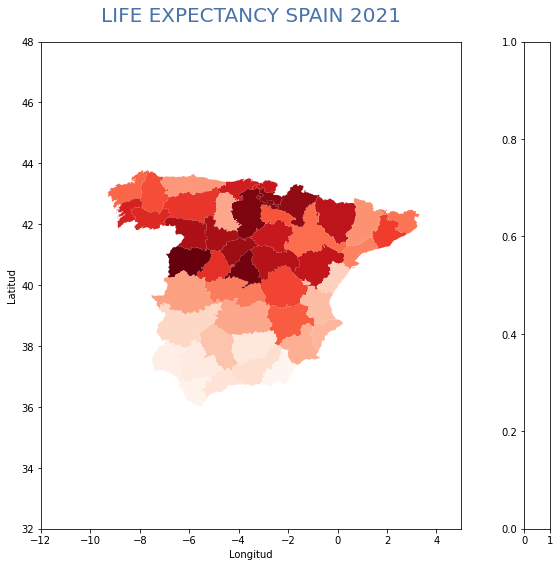

In [4]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('LIFE EXPECTANCY SPAIN 2021', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
merged_data.plot(column = 'EDAD', cmap = 'Reds', ax=ax,
              legend = False, cax=cax, zorder=5)